In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [3]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

SMPS = read_SMPS(path, parent_path, [0, 0])
OPS_APS = read_OPS(path, parent_path)

NS_dict_keys = ['2024-10-15_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan']
NS_bins = SMPS['2024-10-21_NanoScan'].keys()[3:16].to_list()

NS_bg_mean, NS_bg_std, NS_bg_error = bin_mean(['2024/10/21 11:45:00', '2024/10/21 14:10:00'], 
                                              SMPS['2024-10-21_NanoScan'], NS_bins, 'Time', 0.1)

for key in NS_dict_keys:
    df = SMPS[key]
    for i, bin in enumerate(NS_bins):
        df[bin] = df[bin] - NS_bg_mean[i]

    SMPS[key] = df

for key in OPS_APS['20241016_APS'].keys()[4:56]:
    OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key]) * 1000

Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,
Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,


In [4]:
timestamps_wBG = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']]

In [5]:
colors = ['k', 'tab:blue', 'tab:orange', 'tab:green', 'red', 'tab:purple', 'tab:brown', 
              'tab:pink', 'magenta', 'tab:olive', 'tab:cyan', 'navy', 'aquamarine', 'darkolivegreen',
              'darkred', 'darkmagenta', 'chocolate', 'gold']

OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']

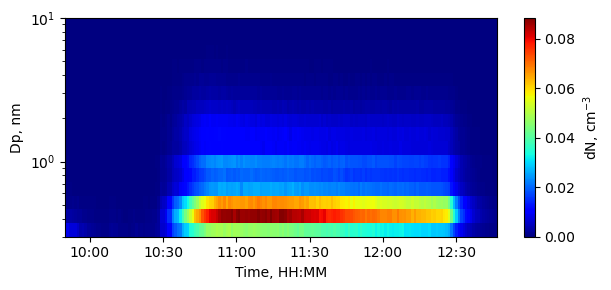

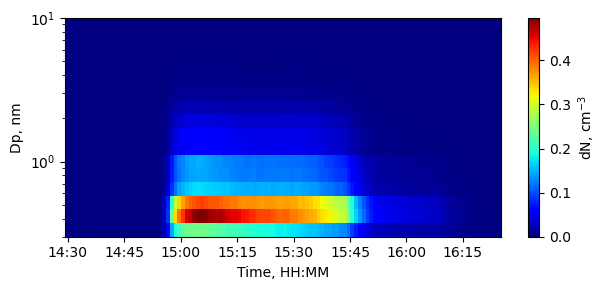

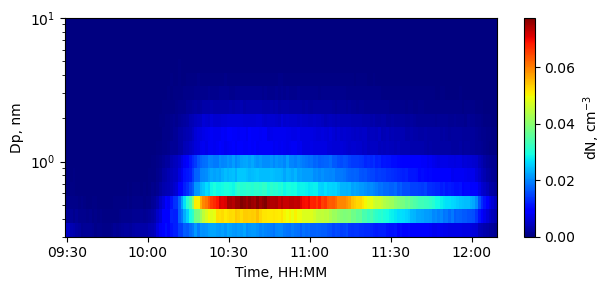

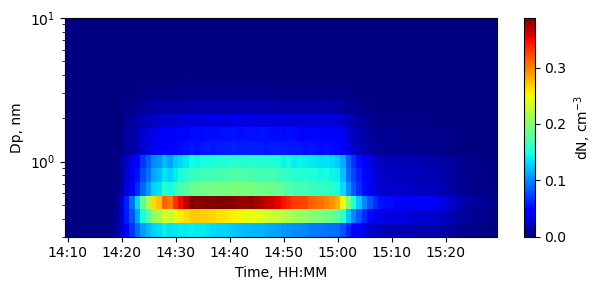

In [6]:
OPS_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]
OPS_keys = OPS_APS['Exp1'].keys()[1:17].to_list()

for i, key in enumerate(OPS_dict_keys):
    name = 'Timeseries/OPS_timeseries_' + key + '.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_timeseries(fig, ax, OPS_APS[key], OPS_keys, OPS_cut_point, 'number', timestamps_wBG[i])

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

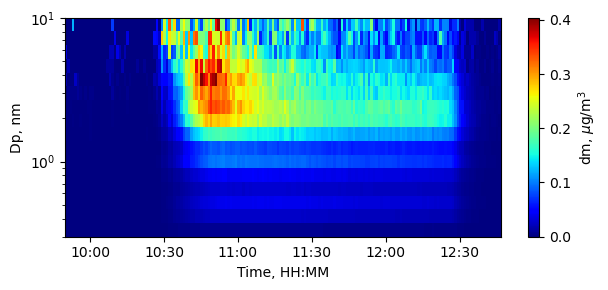

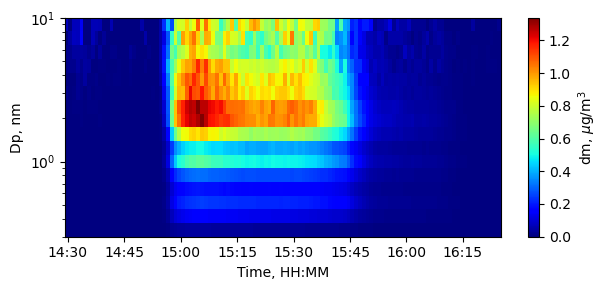

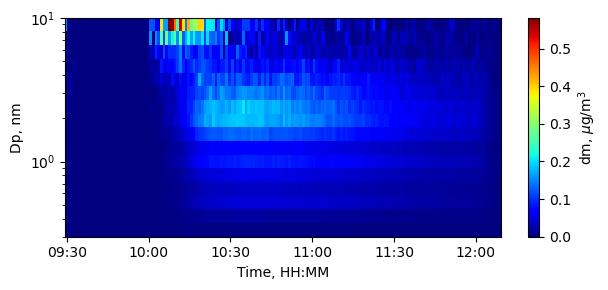

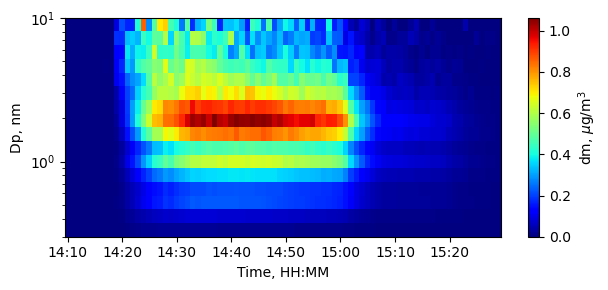

In [9]:
OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]

OPS_mass_conc = {}
for key in OPS_dict_keys:
    mass_conc = calc_mass_conc(OPS_APS[key], OPS_keys, OPS_mid_point, 7.86)
    OPS_mass_conc[key] = mass_conc

for i, key in enumerate(OPS_dict_keys):
    name = 'Timeseries/OPS_timeseries_' + key + 'mass.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_timeseries(fig, ax, OPS_mass_conc[key], OPS_keys, OPS_cut_point, 'mass', timestamps_wBG[i])

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

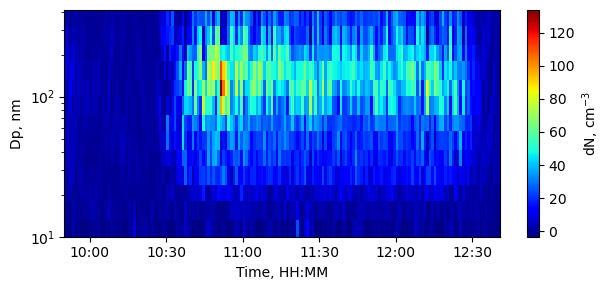

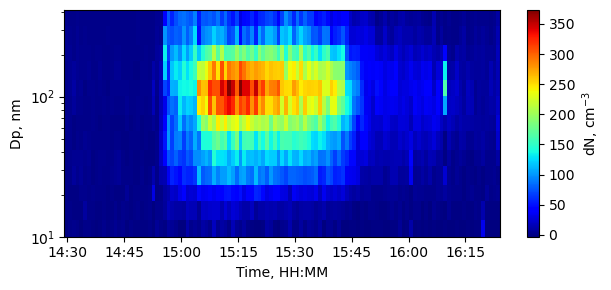

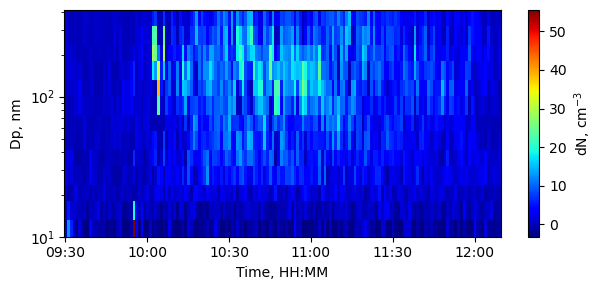

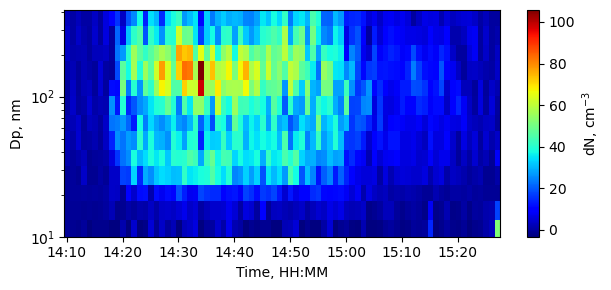

In [15]:
NanoScan_dict_keys = ['2024-10-16_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan', '2024-10-17_NanoScan']
NanoScan_bin_mean = []
for key in SMPS['2024-10-16_NanoScan'].keys()[3:16]:
    NanoScan_bin_mean.append(float(key))
NanoScan_Bins = SMPS['2024-10-16_NanoScan'].keys()[3:16].to_list()

NanoScan_cut_point = bin_edges(10, NanoScan_bin_mean)

for i, key in enumerate(NanoScan_dict_keys):
    exp_number = i + 1
    name = 'Timeseries/NanoScan_timeseries_Exp' + str(exp_number) + '.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_timeseries(fig, ax, SMPS[key], NanoScan_Bins, NanoScan_cut_point, 'number', timestamps_wBG[i])

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

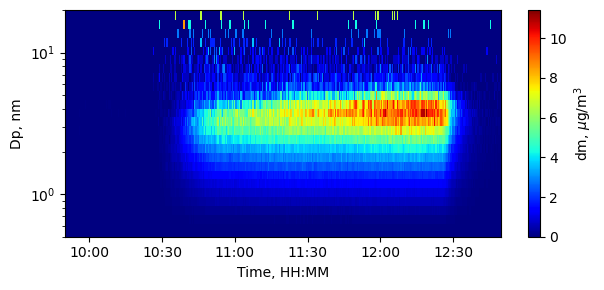

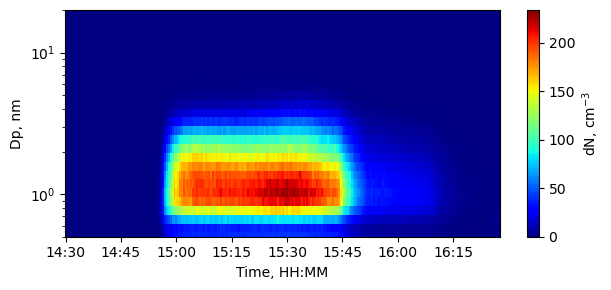

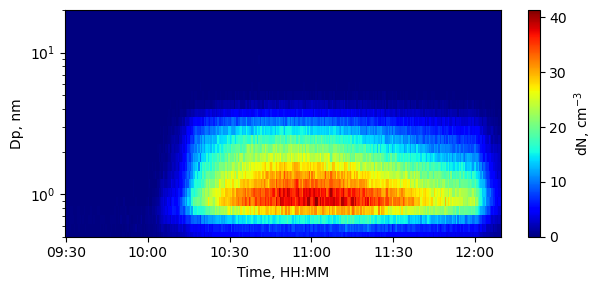

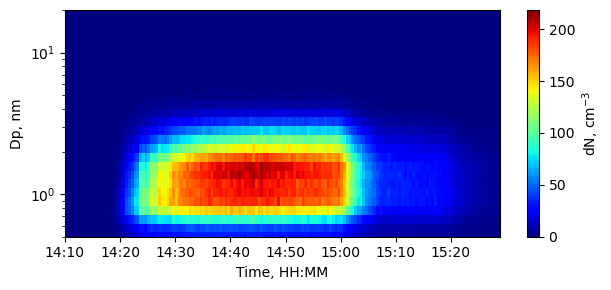

In [16]:
APS_dict_keys = ['20241016_APS_2_exp', '20241017_APS', '20241017_APS']
APS_bins = OPS_APS['20241016_APS'].keys()[4:56].to_list()
APS_bin_mean = [0.523]
for key in OPS_APS['20241016_APS'].keys()[5:56]:
    APS_bin_mean.append(float(key))
APS_cut_point = bin_edges(0.500, APS_bin_mean)

name = 'Timeseries/APS_timeseries_Exp1.png'

fig, ax = plt.subplots(figsize = (6.3, 3))

plot_timeseries(fig, ax, OPS_APS['20241016_APS'], APS_bins, APS_cut_point, 'mass', timestamps_wBG[0])

fig.tight_layout()
fig.savefig(name, dpi = 600)
plt.show()

for i, key in enumerate(APS_dict_keys):
    exp_number = i + 2
    name = 'Timeseries/APS_timeseries_Exp' + str(exp_number) + '.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_timeseries(fig, ax, OPS_APS[key], APS_bins, APS_cut_point, 'number', timestamps_wBG[i+1])

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

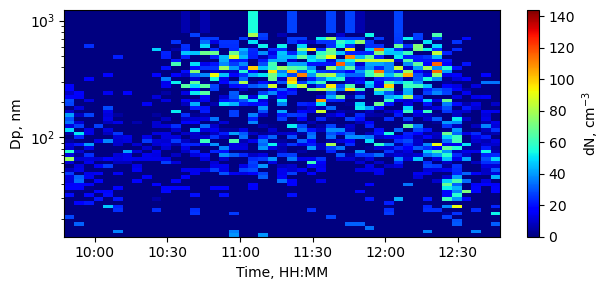

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

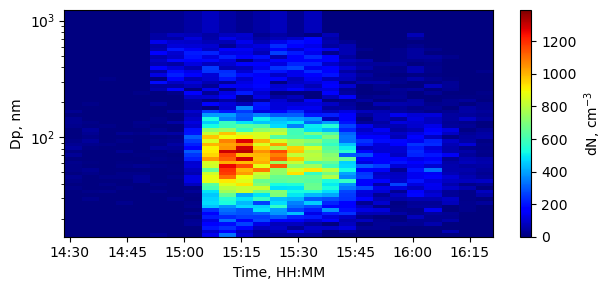

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

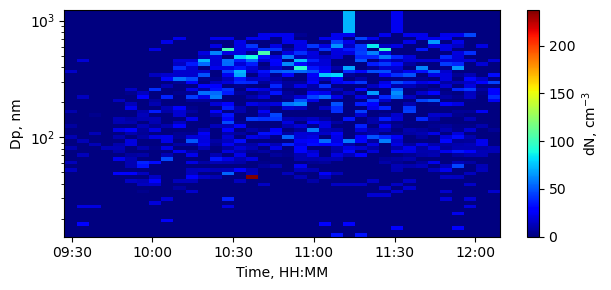

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

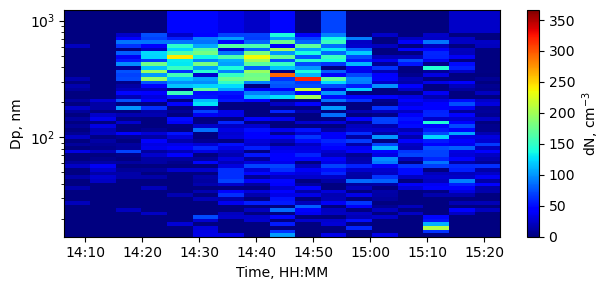

In [17]:
SMPS_dict_keys = ['20241016_SMPS', '20241016_SMPS_2_exp', '20241017_SMPS', '20241017_SMPS']
SMPS_bins = SMPS['20241016_SMPS'].keys()[83:196].to_list()
SMPS_bin_mean = []
for key in SMPS['20241016_SMPS'].keys()[83:196]:
    SMPS_bin_mean.append(float(key))
SMPS_cut_point = bin_edges(14, SMPS_bin_mean)

for i, key in enumerate(SMPS_dict_keys):
    exp_number = i + 1
    name = 'Timeseries/SMPS_timeseries_Exp' + str(exp_number) + '.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_timeseries(fig, ax, SMPS[key], SMPS_bins, SMPS_cut_point, 'number', timestamps_wBG[i])

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

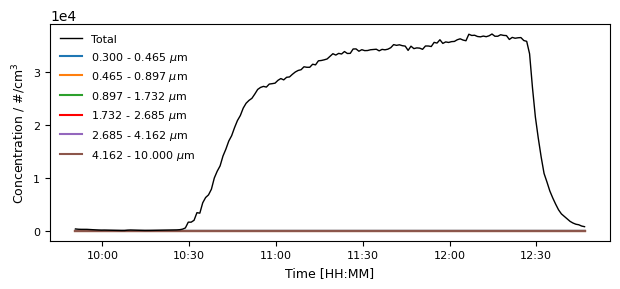

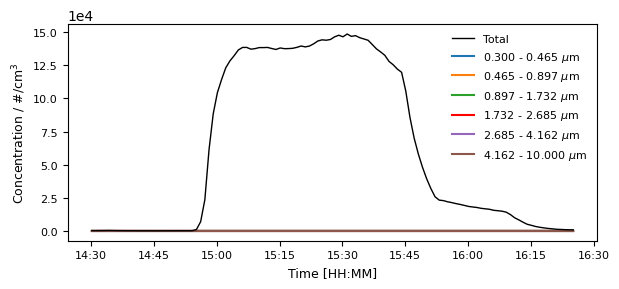

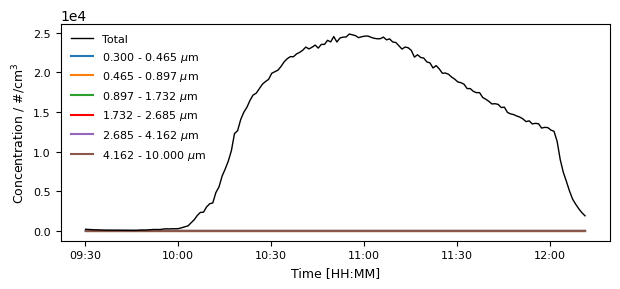

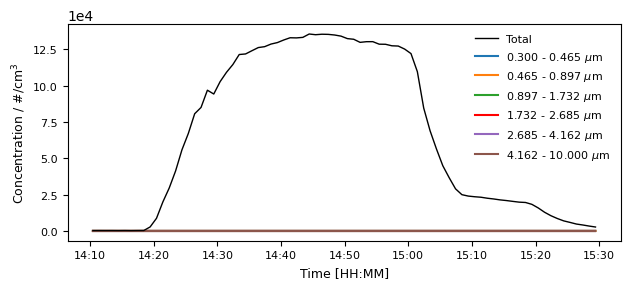

In [10]:
for i, key in enumerate(OPS_dict_keys):
    fig_name = 'Timeseries/OPS_total_' + key + '.png'

    fig, axes = plt.subplots(figsize = (6.3, 3))

    OPS_single_timeseries(axes, OPS_APS[key], colors, timestamps_wBG[i])

    fig.tight_layout()
    fig.savefig(fig_name, dpi = 600)